In [1]:
#imports
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#import csv file 
red = pd.read_csv("data/winequality-red.csv", sep = ';')
red.shape

(1599, 12)

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Wine Data Exploration

In [4]:
red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


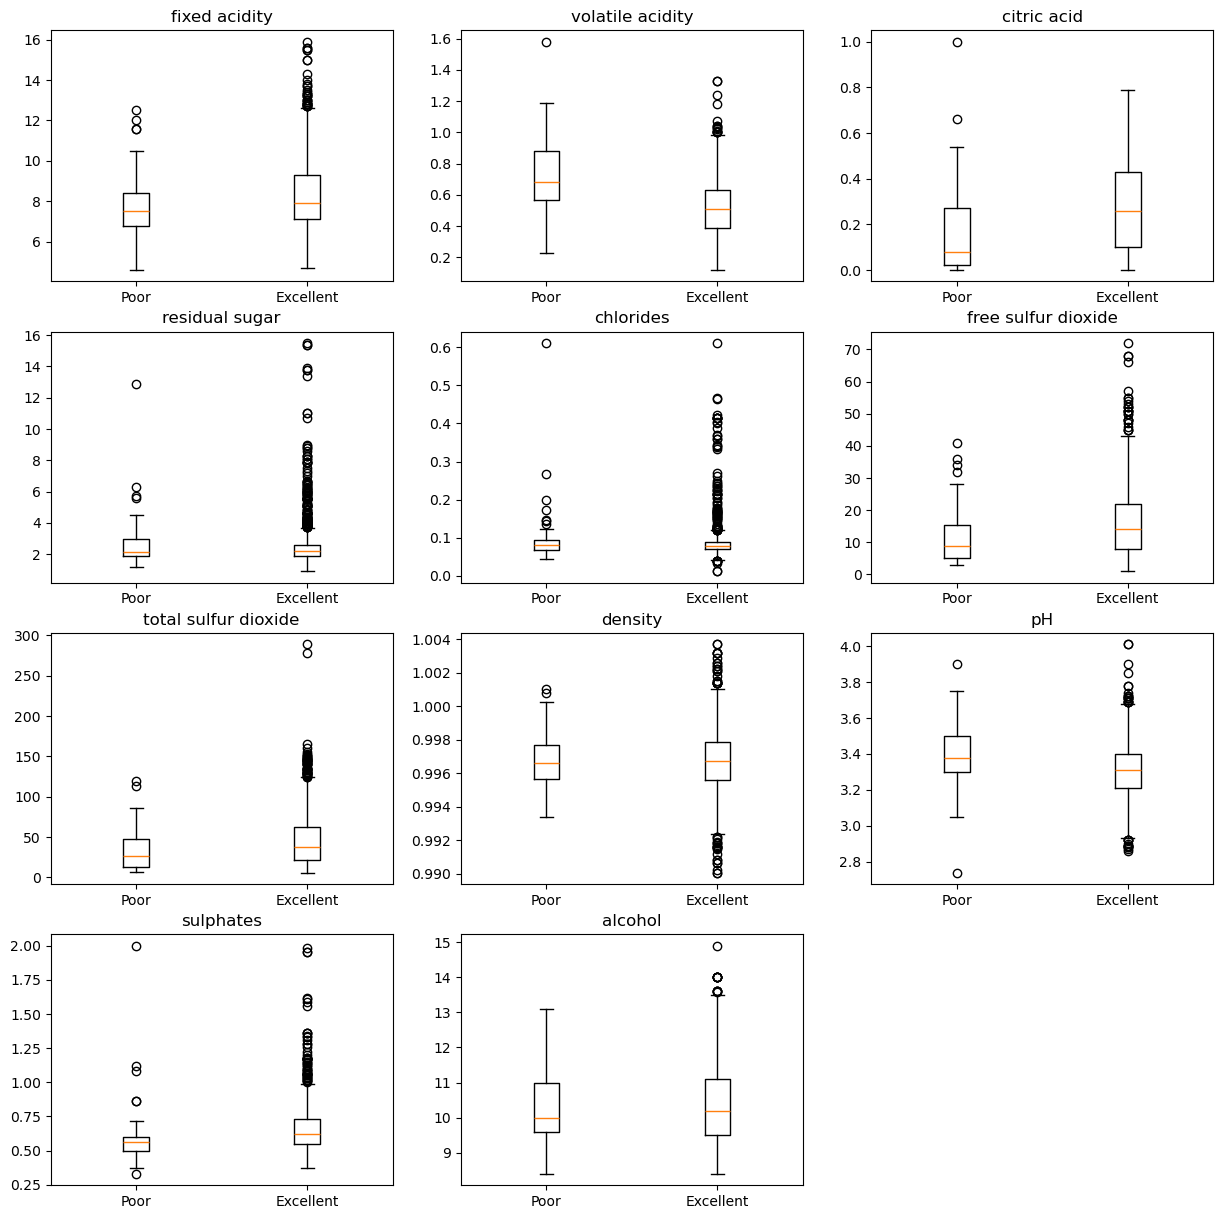

In [5]:
#Boxplots for preliminary distributions

index = 1
plt.figure(figsize=(15, 15))
for col in red.columns:
    if col != 'quality':
        plt.subplot(4,3,index)
        plt.boxplot([red[red['quality']< 5][col], red[red['quality']>=5][col]])
        plt.title(col)
        plt.xticks([1, 2], ["Poor", "Excellent"])
        index+=1
    if index == 13:
        break

plt.show()



quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


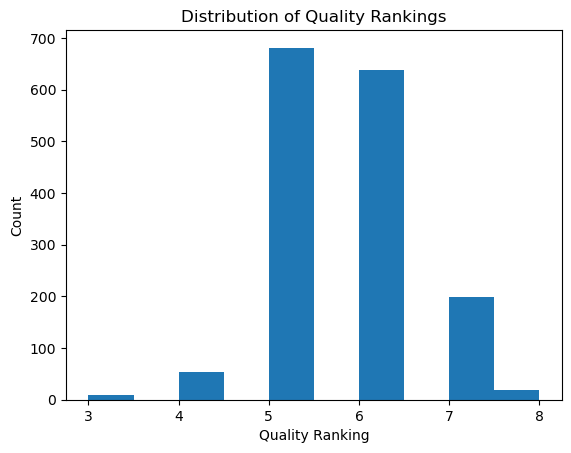

In [6]:
plt.hist(red['quality'])
plt.title('Distribution of Quality Rankings')
plt.xlabel('Quality Ranking')
plt.ylabel('Count')
print(red['quality'].value_counts())

After looking at the boxplots, the most different distirbutions distingusihing a poor quality vs excellent quality is sulfate, pH,volatile acidity, and citric acid.

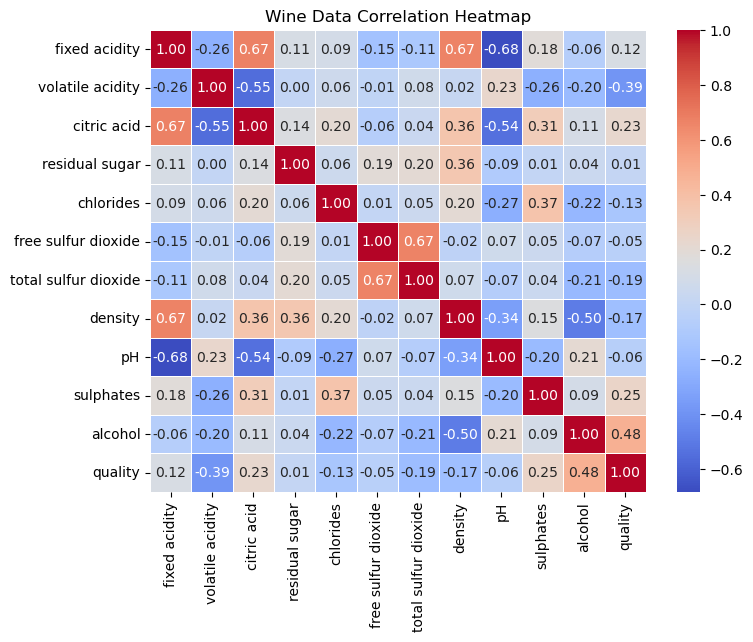

In [7]:
matrix = red.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Wine Data Correlation Heatmap")
plt.show()

The correlation matrix suggests that there are medium correlations between alcohol and volatile acidity with quality.

## Random Forest Classifier

In [8]:

#train-test split, stratify by type since there are a lot more red inputs
features = [ col for col in red.columns if col != 'quality']

X_train, X_test, y_train, y_test = train_test_split(red[features], red['quality'],test_size = .20, stratify = red['quality'], random_state =11)



# Define the base model
rf = RandomForestClassifier(random_state=15)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)



best_rf = grid_search.best_estimator_


#create a random forest withhyperparameter tuning
basic_rf = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_leaf=2, min_samples_split=2,random_state = 11)

basic_rf.fit(X_train, y_train)
y_pred = basic_rf.predict(X_test)


Traceback (most recent call last):
  File "/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"folder","base64_name" for automatic cleanup: unknown resource type ("L3Zhci9mb2xkZXJzL3BnL183am02dnNqMnpnOW16bXYwdDQ2NXI5ODAwMDBnbi9UL2pvYmxpYl9tZW1tYXBwaW5nX2ZvbGRlcl85NzE1NF83ZmI1NDJlOWRjOTY0YWJiOWUxNTQzNDE3ZTg5NjhkZl8wMDI3MTYyMGZhMjE0ZGY1Yjg4MWIwMjQ1NjIyNjFhYQ=="}). Resource type should be one of the following: ['noop', 'folder', 'file', 'semlock']
Traceback (most recent call last):
  File "/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 297, in main
    raise ValueError(
    ...<4 lines>...
    )
ValueError: Cannot register "REGISTER","rtype":"semlock","base64_name" for automatic cleanup: unknown resource t

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
accuracy_basic = accuracy_score(y_test, y_pred)
print(f'The accuracy for the basic RF classifier is {accuracy_basic}')
print(classification_report(y_test, y_pred))

The accuracy for the basic RF classifier is 0.69375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.71      0.72       136
           6       0.66      0.78      0.71       128
           7       0.68      0.62      0.65        40
           8       1.00      0.33      0.50         3

    accuracy                           0.69       320
   macro avg       0.51      0.41      0.43       320
weighted avg       0.67      0.69      0.68       320



/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

[[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0  96  37   3   0]
 [  0   0  21 100   7   0]
 [  0   0   3  12  25   0]
 [  0   0   0   0   2   1]]


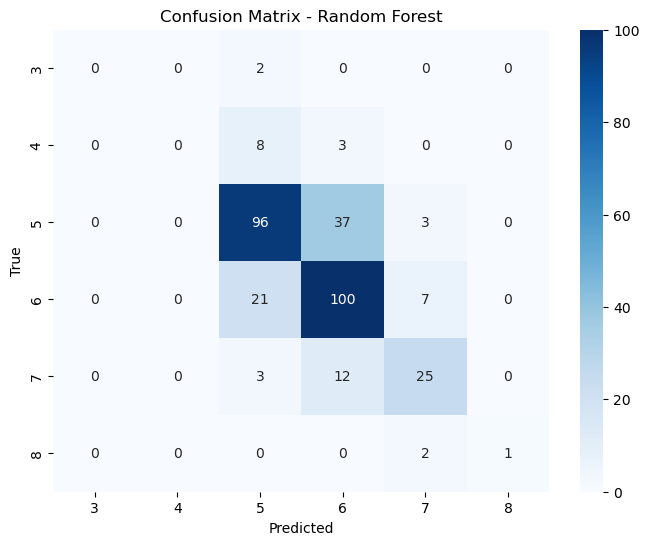

In [10]:

# Predict on test set
y_pred = basic_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()




In [11]:
#get the rf mask for feauture importance, if a feature importance is greater than the median
rf_mask = basic_rf.feature_importances_ > np.median(basic_rf.feature_importances_)
rf_mask
X_train.columns[rf_mask]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [12]:
imprtance_rf= RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_leaf=2, min_samples_split=2,random_state = 11)
imprtance_rf.fit(X_train[X_train.columns[rf_mask]], y_train)
y_pred = imprtance_rf.predict(X_test[X_test.columns[rf_mask]])


In [13]:
accuracy_importance = accuracy_score(y_test, y_pred)
print(f'The accuracy for the importance RF classifier is {accuracy_importance}')

The accuracy for the importance RF classifier is 0.675


In [14]:
#selected features based on correlation matrix
selected_features = ['sulphates', 'pH','volatile acidity', 'citric acid']
selected_rf = RandomForestClassifier(random_state = 11)

selected_rf.fit(X_train[selected_features], y_train)
y_pred = selected_rf.predict(X_test[selected_features])
accuracy_importance = accuracy_score(y_test, y_pred)
print(f'The accuracy for the importace RF classifier is {accuracy_importance}')

The accuracy for the importace RF classifier is 0.590625


After stratifying for quality as there is some unevenness amongst the quality distribution, the best random forest classifier is still just including all the features.

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias=False prevents adding a column of 1s
X_train, X_test, y_train, y_test = train_test_split(red[features], red['quality'],test_size = .20, stratify = red['quality'], random_state =11)

X_train_mapped = poly.fit_transform(X_train)
X_test_mapped = poly.transform(X_test)
print(X_train_mapped.shape)


(1279, 77)


In [16]:
basic_rf = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_leaf=2, min_samples_split=2,random_state = 11)

basic_rf.fit(X_train_mapped, y_train)
y_pred = basic_rf.predict(X_test_mapped)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.68      0.72       136
           6       0.64      0.79      0.71       128
           7       0.66      0.68      0.67        40
           8       1.00      0.33      0.50         3

    accuracy                           0.69       320
   macro avg       0.51      0.41      0.43       320
weighted avg       0.67      0.69      0.68       320



/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [17]:
accuracy_basic = accuracy_score(y_test, y_pred)
print(f'The accuracy for the basic RF classifier is {accuracy_basic}')

The accuracy for the basic RF classifier is 0.690625


In [18]:
#get the rf mask for feauture importance, if a feature importance is greater than the median
rf_mask = basic_rf.feature_importances_ > np.median(basic_rf.feature_importances_)
rf_mask

array([False,  True, False, False, False, False, False,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True])

In [19]:
imprtance_rf= RandomForestClassifier(random_state = 11, n_estimators= 100)
imprtance_rf.fit(X_train_mapped[:,rf_mask], y_train)
y_pred = imprtance_rf.predict(X_test_mapped[:,rf_mask])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.62      0.67       136
           6       0.61      0.78      0.68       128
           7       0.72      0.65      0.68        40
           8       0.50      0.33      0.40         3

    accuracy                           0.66       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.65      0.66      0.65       320



/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [20]:
accuracy_importance = accuracy_score(y_test, y_pred)
print(f'The accuracy for the basic RF classifier is {accuracy_importance}')

The accuracy for the basic RF classifier is 0.6625


## Grouped Classification

In [21]:
red_grouped  = red.copy()
red_grouped['group'] = np.where(red['quality']>5, 1,0)

In [22]:
red_grouped.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [23]:
red_grouped= red_grouped.drop('quality', axis = 1)

In [24]:
red_grouped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [27]:
features = [ col for col in red_grouped.columns if col != 'group']
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(red_grouped[features], red_grouped['group'],test_size = .20, stratify = red_grouped['group'], random_state =11)

In [28]:
basic_rf_g = RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_leaf=2, min_samples_split=2,random_state = 11)

basic_rf_g.fit(X_train_g, y_train_g)
y_pred_g = basic_rf_g.predict(X_test_g)

In [29]:
accuracy_basic_g = accuracy_score(y_test_g, y_pred_g)
print(f'The accuracy for the basic RF classifier is {accuracy_basic_g}')
print(classification_report(y_test, y_pred))

The accuracy for the basic RF classifier is 0.809375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.62      0.67       136
           6       0.61      0.78      0.68       128
           7       0.72      0.65      0.68        40
           8       0.50      0.33      0.40         3

    accuracy                           0.66       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.65      0.66      0.65       320



/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shoshanastadlan/opt/miniconda3/envs/base_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [ ]:
'''
#get the rf mask for feauture importance, if a feature importance is greater than the median
rf_mask = basic_rf.feature_importances_ > np.median(basic_rf.feature_importances_)
rf_mask
X_train.columns[rf_mask]
'''

In [ ]:
'''
imprtance_rf= RandomForestClassifier(n_estimators = 300, max_depth = 20, min_samples_leaf=2, min_samples_split=2,random_state = 11)
imprtance_rf.fit(X_train[X_train.columns[rf_mask]], y_train)
y_pred = imprtance_rf.predict(X_test[X_test.columns[rf_mask]])
accuracy_importance = accuracy_score(y_test, y_pred)
print(f'The accuracy for the basic RF classifier is {accuracy_importance}')
'''